In [1]:
import os, sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('/home/nexus-admin/NEXUS_RF/BackendTools')
import TimestreamHelperFunctions as Thf
import PulseTriggeringTools as Ptt

import PyMKID_USRP_functions as PUf
import PyMKID_resolution_functions as Prf

# %matplotlib notebook

In [2]:
## Define the runs of interest
run_dict = {"series": [
    "20220706_182417",
    "20220706_182249",
    "20220706_182122",
    "20220706_181948",
    "20220706_181818",
    "20220706_181644",
    "20220706_181510",
    "20220706_181335",
    "20220706_181116"] , 
            "Vled"  : [
    6.000,
    5.500,
    5.000,
    4.500,
    4.000,
    3.500,
    3.000,
    2.500,
    2.000] }
n_runs = len(run_dict["series"])
run_df = pd.DataFrame(run_dict)
print("Total runs:",n_runs)

Total runs: 9


In [3]:
noise_files = np.zeros(n_runs, dtype='object')
vna_files   = np.zeros(n_runs, dtype='object')
powers      = np.zeros(n_runs)
i = 0

for series in run_df['series'].to_numpy():
    data_path = os.path.join('/data/USRP_Noise_Scans',series.split('_')[0],series)
    sum_file, dly_file, vna_file, tone_files = Thf.GetFiles(series, verbose=False)
    metadata, avg_frqs, avg_S21s = Thf.UnpackSummary(sum_file)
    powers[i]      = metadata['power']
    noise_files[i] = tone_files[0]
    vna_files[i]   = vna_file
    i += 1
    
run_df["noise path"] = noise_files
run_df["vna path"]   = vna_files
run_df["power"]      = powers

## Fill these columns in later
run_df["pls_sec_s"] = [None]*n_runs
run_df["N_pls_fnd"] = [None]*n_runs # np.zeros(n_runs, dtype=type(None))
run_df["p_rate_Hz"] = [None]*n_runs # np.zeros(n_runs, dtype=type(None))
run_df["pls_sec_f"] = [None]*n_runs # np.zeros(n_runs, dtype=type(None))
run_df

,series,Vled,noise path,vna path,power,pls_sec_s,N_pls_fnd,p_rate_Hz,pls_sec_f
0,20220706_182417,6.0,/data/USRP_Noise_Scans/20220706/20220706_18241...,/data/USRP_Noise_Scans/20220706/20220706_18241...,-30.0,None,None,None,None
1,20220706_182249,5.5,/data/USRP_Noise_Scans/20220706/20220706_18224...,/data/USRP_Noise_Scans/20220706/20220706_18224...,-30.0,None,None,None,None
2,20220706_182122,5.0,/data/USRP_Noise_Scans/20220706/20220706_18212...,/data/USRP_Noise_Scans/20220706/20220706_18212...,-30.0,None,None,None,None
3,20220706_181948,4.5,/data/USRP_Noise_Scans/20220706/20220706_18194...,/data/USRP_Noise_Scans/20220706/20220706_18194...,-30.0,None,None,None,None
4,20220706_181818,4.0,/data/USRP_Noise_Scans/20220706/20220706_18181...,/data/USRP_Noise_Scans/20220706/20220706_18181...,-30.0,None,None,None,None
5,20220706_181644,3.5,/data/USRP_Noise_Scans/20220706/20220706_18164...,/data/USRP_Noise_Scans/20220706/20220706_18164...,-30.0,None,None,None,None
6,20220706_181510,3.0,/data/USRP_Noise_Scans/20220706/20220706_18151...,/data/USRP_Noise_Scans/20220706/20220706_18151...,-30.0,None,None,None,None
7,20220706_181335,2.5,/data/USRP_Noise_Scans/20220706/20220706_18133...,/data/USRP_Noise_Scans/20220706/20220706_18133...,-30.0,None,None,None,None
8,20220706_181116,2.0,/data/USRP_Noise_Scans/20220706/20220706_18111...,/data/USRP_Noise_Scans/20220706/20220706_18111...,-30.0,None,None,None,None


In [4]:
dec_fac = 100

## Store some known values
_ = 0
run_df["pls_sec_s"].iloc[_] = 4.4045
run_df["N_pls_fnd"].iloc[_] = None
run_df["p_rate_Hz"].iloc[_] = 250
run_df["pls_sec_f"].iloc[_] = 10.0

_ = 1
run_df["pls_sec_s"].iloc[_] = 5.648
run_df["N_pls_fnd"].iloc[_] = None
run_df["p_rate_Hz"].iloc[_] = 250
run_df["pls_sec_f"].iloc[_] = 10.0

_ = 2
run_df["pls_sec_s"].iloc[_] = 4.93525
run_df["N_pls_fnd"].iloc[_] = None
run_df["p_rate_Hz"].iloc[_] = 250
run_df["pls_sec_f"].iloc[_] = 10.0

_ = 3
run_df["pls_sec_s"].iloc[_] = 5.0115
run_df["N_pls_fnd"].iloc[_] = None
run_df["p_rate_Hz"].iloc[_] = 250
run_df["pls_sec_f"].iloc[_] = 10.0

_ = 4
run_df["pls_sec_s"].iloc[_] = 4.6915
run_df["N_pls_fnd"].iloc[_] = None
run_df["p_rate_Hz"].iloc[_] = 250
run_df["pls_sec_f"].iloc[_] = 10.0

_ = 5
run_df["pls_sec_s"].iloc[_] = 4.802
run_df["N_pls_fnd"].iloc[_] = None
run_df["p_rate_Hz"].iloc[_] = 250
run_df["pls_sec_f"].iloc[_] = 10.0

_ = 6
run_df["pls_sec_s"].iloc[_] = 5.7360
run_df["N_pls_fnd"].iloc[_] = None
run_df["p_rate_Hz"].iloc[_] = 250
run_df["pls_sec_f"].iloc[_] = 10.0

_ = 7
run_df["pls_sec_s"].iloc[_] = 5.8785
run_df["N_pls_fnd"].iloc[_] = None
run_df["p_rate_Hz"].iloc[_] = 250
run_df["pls_sec_f"].iloc[_] = 10.0

_ = 8
run_df["pls_sec_s"].iloc[_] = 4.8825
run_df["N_pls_fnd"].iloc[_] = None
run_df["p_rate_Hz"].iloc[_] = 250
run_df["pls_sec_f"].iloc[_] = 10.0

run_df

/usr/local/share/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,series,Vled,noise path,vna path,power,pls_sec_s,N_pls_fnd,p_rate_Hz,pls_sec_f
0,20220706_182417,6.0,/data/USRP_Noise_Scans/20220706/20220706_18241...,/data/USRP_Noise_Scans/20220706/20220706_18241...,-30.0,4.4045,None,250,10
1,20220706_182249,5.5,/data/USRP_Noise_Scans/20220706/20220706_18224...,/data/USRP_Noise_Scans/20220706/20220706_18224...,-30.0,5.648,None,250,10
2,20220706_182122,5.0,/data/USRP_Noise_Scans/20220706/20220706_18212...,/data/USRP_Noise_Scans/20220706/20220706_18212...,-30.0,4.93525,None,250,10
3,20220706_181948,4.5,/data/USRP_Noise_Scans/20220706/20220706_18194...,/data/USRP_Noise_Scans/20220706/20220706_18194...,-30.0,5.0115,None,250,10
4,20220706_181818,4.0,/data/USRP_Noise_Scans/20220706/20220706_18181...,/data/USRP_Noise_Scans/20220706/20220706_18181...,-30.0,4.6915,None,250,10
5,20220706_181644,3.5,/data/USRP_Noise_Scans/20220706/20220706_18164...,/data/USRP_Noise_Scans/20220706/20220706_18164...,-30.0,4.802,None,250,10
6,20220706_181510,3.0,/data/USRP_Noise_Scans/20220706/20220706_18151...,/data/USRP_Noise_Scans/20220706/20220706_18151...,-30.0,5.736,None,250,10
7,20220706_181335,2.5,/data/USRP_Noise_Scans/20220706/20220706_18133...,/data/USRP_Noise_Scans/20220706/20220706_18133...,-30.0,5.8785,None,250,10
8,20220706_181116,2.0,/data/USRP_Noise_Scans/20220706/20220706_18111...,/data/USRP_Noise_Scans/20220706/20220706_18111...,-30.0,4.8825,None,250,10


In [5]:
idx = 6
series = run_df["series"].iloc[idx]
Vled   = run_df["Vled"].iloc[idx]
tsec   = run_df["pls_sec_s"].iloc[idx]
print(series, ":", Vled, "V", ":", tsec, "s")

20220706_181510 : 3.0 V : 5.736 s


Line Delay file:  /data/USRP_Noise_Scans/20220706/20220706_181510/USRP_Delay_20220706_181510.h5
VNA scan file:    /data/USRP_Noise_Scans/20220706/20220706_181510/USRP_VNA_20220706_181510.h5
Timestream files: ['/data/USRP_Noise_Scans/20220706/20220706_181510/USRP_Noise_20220706_181510_delta0.h5']
Summary file:	 /data/USRP_Noise_Scans/20220706/20220706_181510/noise_averages_20220706_181510.h5
Will separate data into  1000 chunks to achieve the requested 1.00e+02  Hz low  end of the PSD
Additional decimation by 20 needed to achieve the requested 5.00e+04  Hz high end of the PSD
Will convert to resonator basis!
doing additional decimation
sampling frequency plugged into welch is 50000
pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20220706/20220706_181510/USRP_Noise_20220706_181510_delta0.h5 because override=True!
found 281 pulses
chunk length plugged into welch is 500
chunked data into 1000 timestreams
compu

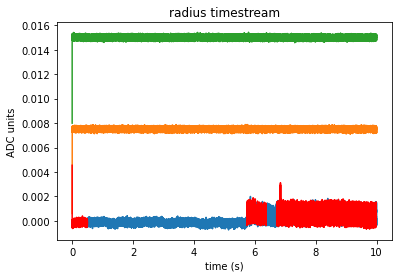

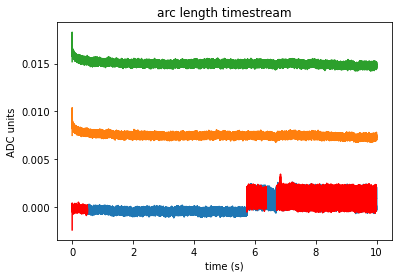

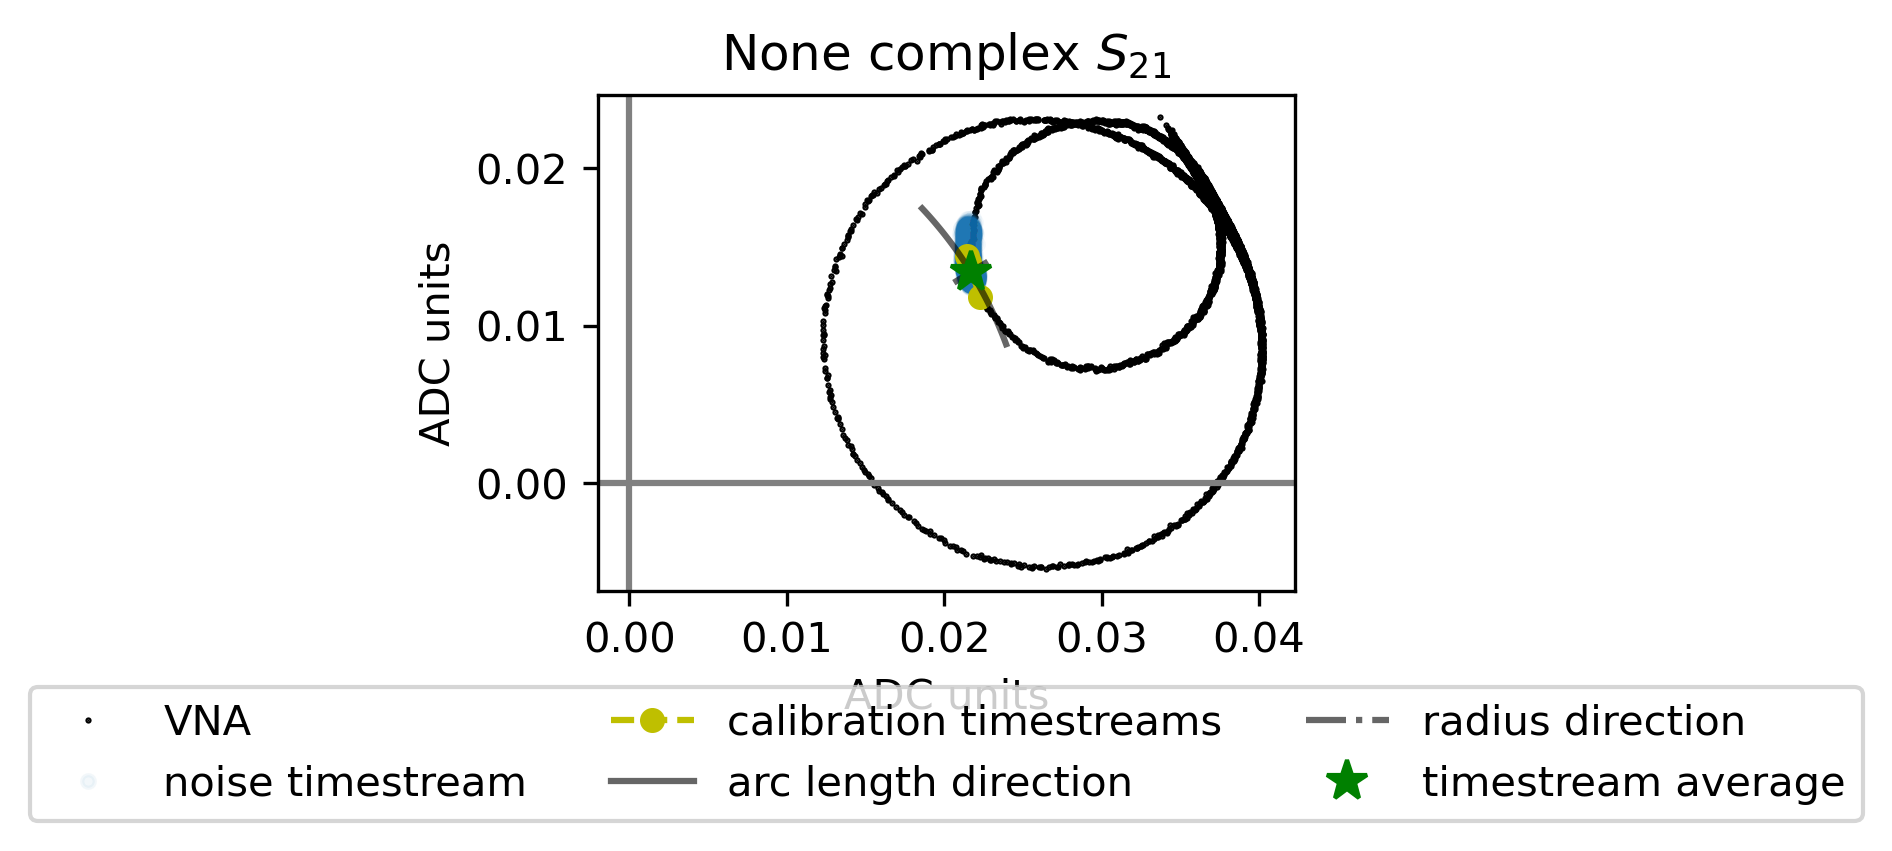

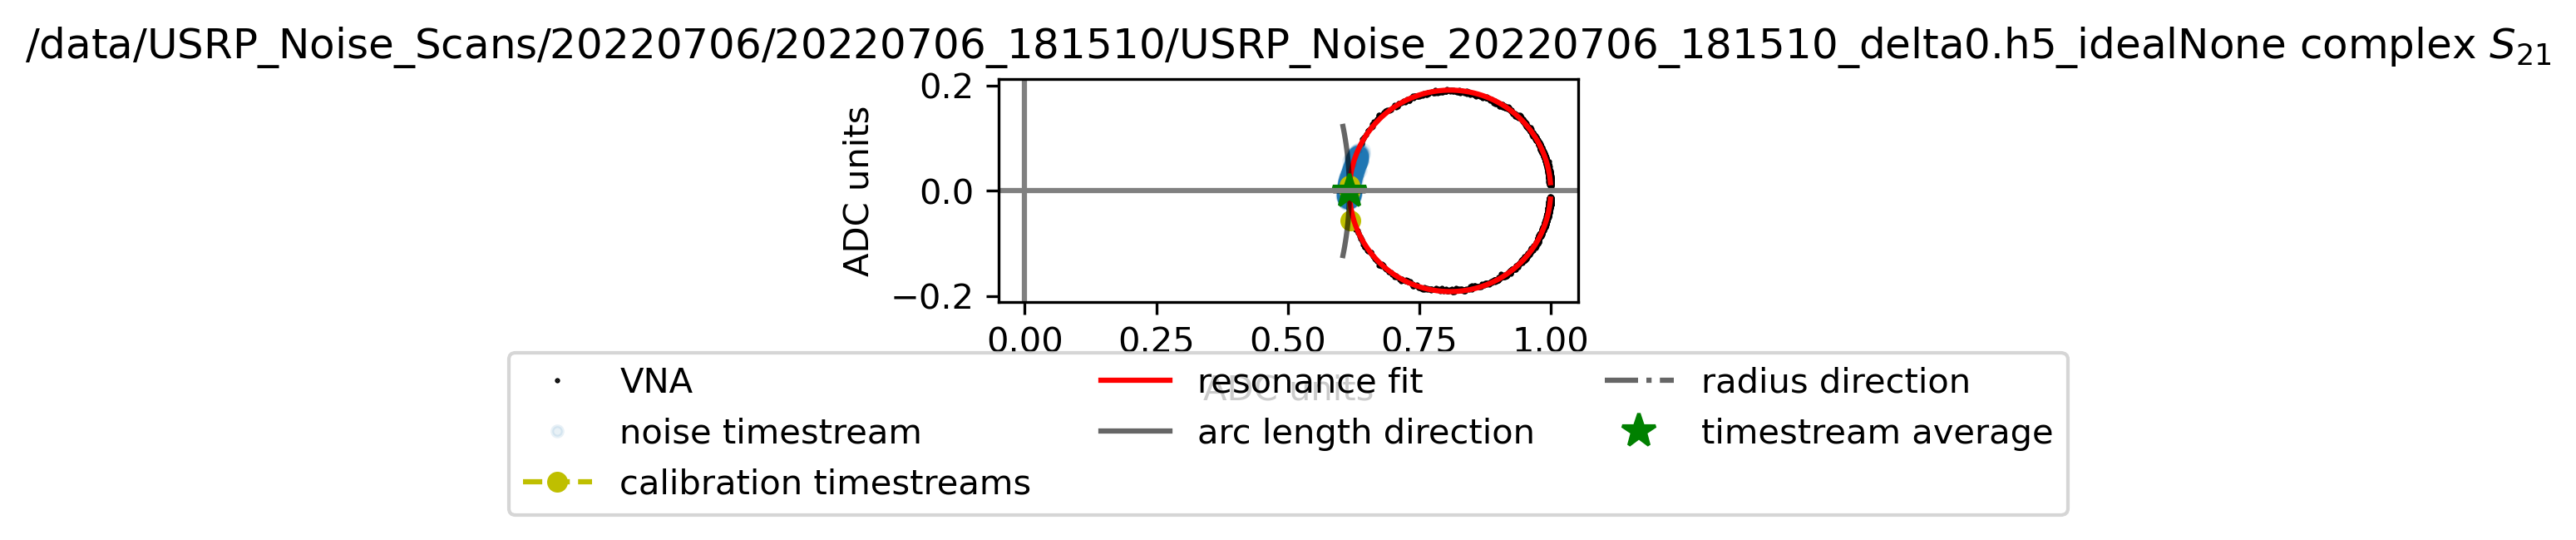

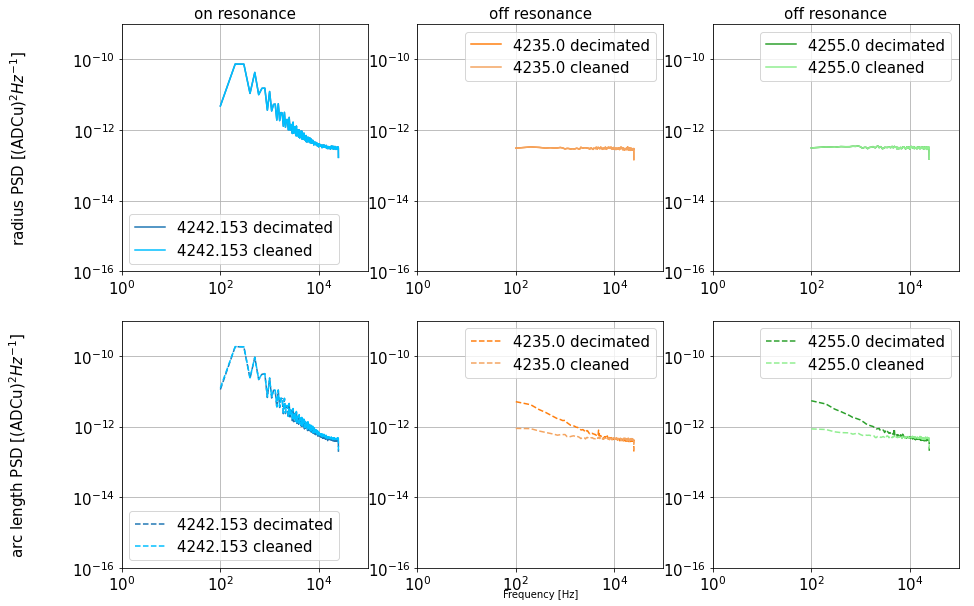

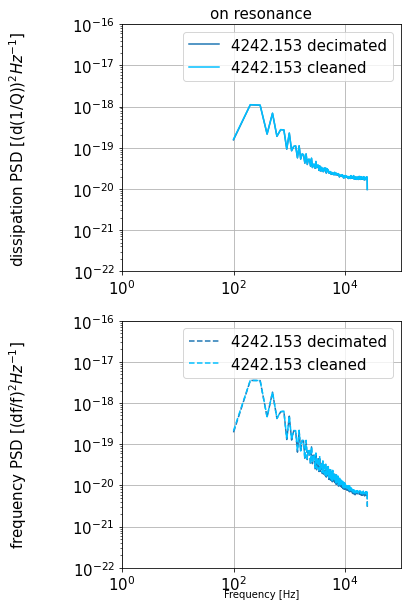

In [6]:
powers_, PSDs_, res_, timestreams_ = Thf.CleanPSDs(None,None,series=series, f_transient=0.05)

In [7]:
## Get the timestream and decimate it
sum_file, dly_file, vna_file, tone_files = Thf.GetFiles(series)

data_noise, data_info = PUf.unavg_noi(tone_files[0])
time = data_info['time']
time_correction = data_info['sampling period']

data_noise = Prf.average_decimate(data_noise, decimation=dec_fac)
## data_noise is complex values of S21
## can take Re() and Im() to get I, Q
## can take abs() and angle() to get magnitude and phase
time_correction *= dec_fac
time = time[::dec_fac]

In [8]:
res = Ptt.readDataFile(series)

Line Delay file:  /data/USRP_Noise_Scans/20220706/20220706_181510/USRP_Delay_20220706_181510.h5
VNA scan file:    /data/USRP_Noise_Scans/20220706/20220706_181510/USRP_VNA_20220706_181510.h5
Timestream files: ['/data/USRP_Noise_Scans/20220706/20220706_181510/USRP_Noise_20220706_181510_delta0.h5']
Summary file:	 /data/USRP_Noise_Scans/20220706/20220706_181510/noise_averages_20220706_181510.h5


Text(0, 0.5, '$\\mathrm{arg}(S_{21})$ [rad]')

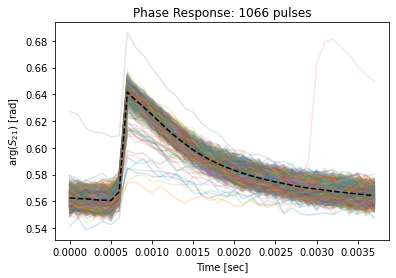

In [9]:
plot_vs_time = True
avg_p, npulses, bl, win = Ptt.StackPulses(np.angle(data_noise[:,0]), run_df["pls_sec_s"].iloc[idx],
                                        win_fac=0.95, Npulses=run_df["N_pls_fnd"].iloc[idx], 
                                        pulse_rate_Hz=run_df["p_rate_Hz"].iloc[idx], sample_rate=1e6/dec_fac,
                                        bl_subtract=False, show_plots=True, plot_time=plot_vs_time)
plt.gca().set_title("Phase Response: "+str(npulses)+" pulses")
plt.gca().set_xlabel(r"Decimated sample index")
if plot_vs_time:
    plt.gca().set_xlabel(r"Time [sec]")
plt.gca().set_ylabel(r"$\mathrm{arg}(S_{21})$ [rad]")
# plt.gca().set_ylabel(r"$\mathrm{arg}(S_{21})$ [deg]")

Text(0, 0.5, '$|S_{21}|$ [dBm]')

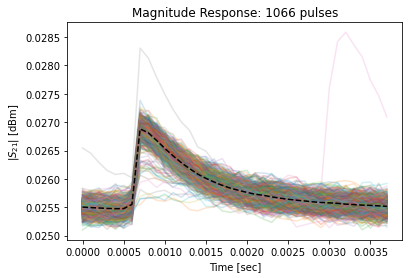

In [10]:
plot_vs_time = True
avg_m, npulses, bl, win = Ptt.StackPulses(np.abs(data_noise[:,0]), run_df["pls_sec_s"].iloc[idx],
                                        win_fac=0.95, Npulses=run_df["N_pls_fnd"].iloc[idx], 
                                        pulse_rate_Hz=run_df["p_rate_Hz"].iloc[idx], sample_rate=1e6/dec_fac,
                                        bl_subtract=False, show_plots=True, plot_time=plot_vs_time)
plt.gca().set_title("Magnitude Response: "+str(npulses)+" pulses")
plt.gca().set_xlabel(r"Decimated sample index")
if plot_vs_time:
    plt.gca().set_xlabel(r"Time [sec]")
plt.gca().set_ylabel(r"$|S_{21}|$ [dBm]")

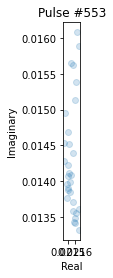

In [11]:
pidx = int(npulses*np.random.rand())
Ptt.PlotPulse(data_noise[:,0], run_df["pls_sec_s"].iloc[idx], p_index=pidx, fig_obj=None,
              pulse_rate_Hz=run_df["p_rate_Hz"].iloc[idx], win_fac=0.75, sample_rate=1e6/dec_fac,
              baseline=None, complx=True)
ax0 = plt.gca()
ax0.set_title("Pulse #"+str(pidx))
ax0.set_xlabel("Real")
ax0.set_ylabel("Imaginary")
ax0.set_aspect('equal', 'box')

In [12]:
VNA_f, VNA_z = PUf.read_vna(vna_file)

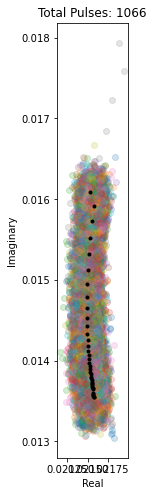

In [13]:
fig = plt.figure(figsize=(8,8))
ax0 = plt.gca()
for i in np.arange(npulses):
    Ptt.PlotPulse(data_noise[:,0], run_df["pls_sec_s"].iloc[idx], p_index=i, fig_obj=fig,
                  pulse_rate_Hz=run_df["p_rate_Hz"].iloc[idx], win_fac=0.75, sample_rate=1e6/dec_fac,
                  baseline=None, complx=True)
ax0.set_title("Total Pulses: "+str(npulses))
ax0.set_xlabel("Real")
ax0.set_ylabel("Imaginary")
ax0.set_aspect('equal', 'box')
ax0.scatter(np.real(avg_m * np.exp(1j*avg_p)),
            np.imag(avg_m * np.exp(1j*avg_p)),
            c='k',marker='.')

(0.012797584338113666, 0.018183623859658837)

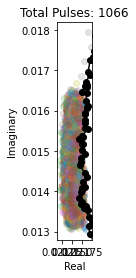

In [14]:
fig = plt.figure()
ax0 = plt.gca()
for i in np.arange(npulses):
    Ptt.PlotPulse(data_noise[:,0], run_df["pls_sec_s"].iloc[idx], p_index=i, fig_obj=fig,
                  pulse_rate_Hz=run_df["p_rate_Hz"].iloc[idx], win_fac=0.75, sample_rate=1e6/dec_fac,
                  baseline=None, complx=True)
ax0.set_title("Total Pulses: "+str(npulses))
ax0.set_xlabel("Real")
ax0.set_ylabel("Imaginary")
ax0.set_aspect('equal', 'box')


xlims = ax0.get_xlim()
ylims = ax0.get_ylim()
ax0.plot(np.real(VNA_z[(VNA_f>4.24205e3)*(VNA_f<4.24235e3)]),
         np.imag(VNA_z[(VNA_f>4.24205e3)*(VNA_f<4.24235e3)]),
         "k-",marker='o')
ax0.set_xlim(xlims)
ax0.set_ylim(ylims)

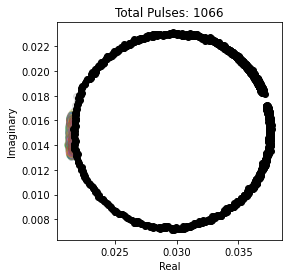

In [15]:
fig = plt.figure()
ax0 = plt.gca()
for i in np.arange(npulses):
    Ptt.PlotPulse(data_noise[:,0], run_df["pls_sec_s"].iloc[idx], p_index=i, fig_obj=fig,
                  pulse_rate_Hz=run_df["p_rate_Hz"].iloc[idx], win_fac=0.75, sample_rate=1e6/dec_fac,
                  baseline=None, complx=True)
ax0.set_title("Total Pulses: "+str(npulses))
ax0.set_xlabel("Real")
ax0.set_ylabel("Imaginary")
ax0.set_aspect('equal', 'box')

ax0.plot(np.real(VNA_z[(VNA_f>4.24205e3)*(VNA_f<4.24235e3)]),
         np.imag(VNA_z[(VNA_f>4.24205e3)*(VNA_f<4.24235e3)]),
         "k-",marker='o')

In [16]:
## Size of signal
z_roi = VNA_z[(VNA_f>4.24205e3)*(VNA_f<4.24235e3)]
i_min = np.argmin(np.real(z_roi))
i_max = np.argmax(np.real(z_roi))
rad   = np.abs(z_roi[i_max]-z_roi[i_min])
print(rad)

0.016074687


In [17]:
## Size of noise
noise = 0.0003247
snr   = rad/noise
print("SNR ~",snr)

SNR ~ 49.50627423008296


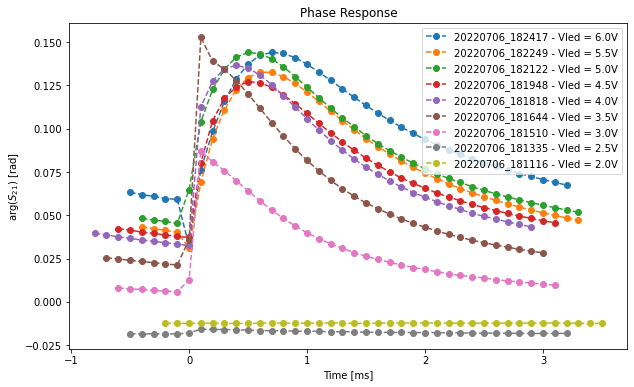

In [21]:
## Create a figure to house the average phase responses
fig = plt.figure(figsize=(10,6))
ax0 = fig.gca()

ax0.set_title("Phase Response")
ax0.set_xlabel("Time [ms]")
ax0.set_ylabel(r"$\mathrm{arg}(S_{21})$ [rad]")

## Now loop over the first three files and extract the average phase response 
for j in np.arange(n_runs):
    series = run_df["series"].iloc[j]
    Vled   = run_df["Vled"].iloc[j]
    
    ## Get the timestream and decimate it
    sum_file, dly_file, vna_file, tone_files = Thf.GetFiles(series)

    data_noise, data_info = PUf.unavg_noi(tone_files[0])
    data_noise = Prf.average_decimate(data_noise, decimation=dec_fac)

    avg, npulses, bl, win = Ptt.StackPulses(np.angle(data_noise[:,0]), run_df["pls_sec_s"].iloc[j],
                                        win_fac=0.95, Npulses=run_df["N_pls_fnd"].iloc[j], 
                                        pulse_rate_Hz=run_df["p_rate_Hz"].iloc[idx], sample_rate=1e6/dec_fac,
                                        bl_subtract=True, show_plots=False, plot_time=True)
    
    time_range = np.arange(len(avg))/(1e6/dec_fac)
    time_range = time_range - time_range[np.argmax(avg[1:]-avg[:-1])]
    
    ax0.plot(time_range*1e3,avg,linestyle="--",marker="o",label=series+" - Vled = "+str(Vled)+"V")
    
ax0.legend(loc='best')

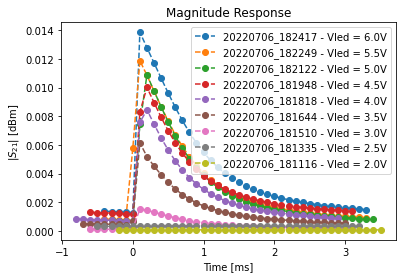

In [19]:
## Create a figure to house the average phase responses
fig = plt.figure()
ax0 = fig.gca()

ax0.set_title("Magnitude Response")
ax0.set_xlabel("Time [ms]")
ax0.set_ylabel(r"$|S_{21}|$ [dBm]")

## Now loop over the first three files and extract the average phase response 
for j in np.arange(n_runs):
    series = run_df["series"].iloc[j]
    Vled   = run_df["Vled"].iloc[j]
    
    ## Get the timestream and decimate it
    sum_file, dly_file, vna_file, tone_files = Thf.GetFiles(series)

    data_noise, data_info = PUf.unavg_noi(tone_files[0])
    data_noise = Prf.average_decimate(data_noise, decimation=dec_fac)

    avg, npulses, bl, win = Ptt.StackPulses(np.abs(data_noise[:,0]), run_df["pls_sec_s"].iloc[j],
                                        win_fac=0.95, Npulses=run_df["N_pls_fnd"].iloc[j], 
                                        pulse_rate_Hz=run_df["p_rate_Hz"].iloc[idx], sample_rate=1e6/dec_fac,
                                        bl_subtract=True, show_plots=False, plot_time=True)
    
    time_range = np.arange(len(avg))/(1e6/dec_fac)
    time_range = time_range - time_range[np.argmax(avg[1:]-avg[:-1])]
    
    ax0.plot(time_range*1e3,avg,linestyle="--",marker="o",label=series+" - Vled = "+str(Vled)+"V")
    
ax0.legend(loc='best')